In [ ]:
# CONTENTS
1 Importing libraries
2 Importing data
3 Exploring customer variables relevant to profiling
3.1 Region mapping using U.S. Census Bureau classification
3.2 Activity customer level 
3.3 Age
3.4 Income
3.5 Dependants
3.4 Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
4 Compare your customer profiles with regions and departments.
4.1 Sales in various departments
8 Exporting data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'D:\DATA ANALYSIS\Achievement 4 project 29-04-2025\03 Scripts\Prepared Folder\df_ords_large.pkl'

In [3]:
path

'D:\\DATA ANALYSIS\\Achievement 4 project 29-04-2025\\03 Scripts\\Prepared Folder\\df_ords_large.pkl'

In [4]:
df_ords = pd.read_pickle(path)

In [5]:
df_ords.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,first name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,True
0,0,0,2539329,1,1,2,8,NaN,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,1,2398795,1,2,3,7,15.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,2,473747,1,3,3,12,21.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,3,2254736,1,4,4,7,29.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,4,431534,1,5,4,15,28.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
df_ords_2 = df_ords.drop(columns = ['first name', 'surname'])   # dropping columns PII data protection

In [7]:
df_ords_2.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,True
0,0,0,2539329,1,1,2,8,NaN,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,1,2398795,1,2,3,7,15.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,2,473747,1,3,3,12,21.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,3,2254736,1,4,4,7,29.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,4,431534,1,5,4,15,28.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [8]:
# Region mapping using U.S. Census Bureau classification
def get_region(state):
    northeast = [
        'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
        'New Jersey', 'New York', 'Pennsylvania'
    ]
    midwest = [
        'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
        'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'
    ]
    south = [
        'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
        'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
        'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'
    ]
    west = [
        'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
        'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'
    ]

    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

In [9]:
# Apply to your DataFrame
df_ords_2['region'] = df_ords_2['state'].apply(get_region)

In [10]:
# Basic cross-tabulation
spending_by_region = pd.crosstab(df_ords_2['region'], df_ords_2['spending_flag'])
print(spending_by_region)

spending_flag  High spender  Low spender
region                                  
Midwest              156129      7447681
Northeast            108343      5620004
South                210182     10591428
West                 160807      8139638


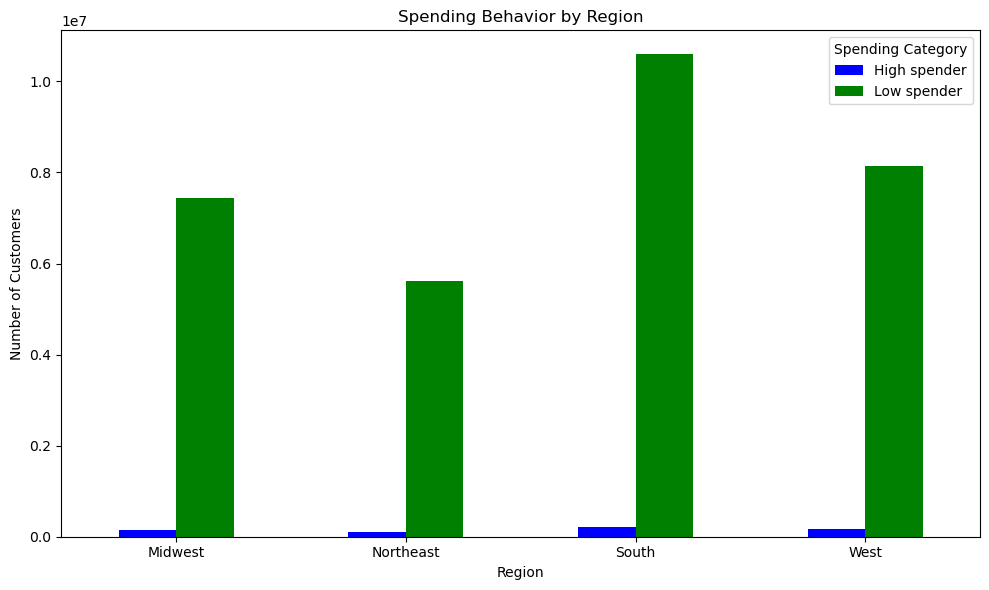

In [11]:
# Plot the clustered column chart
spending_by_region = spending_by_region.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])

# Chart details
plt.title('Spending Behavior by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Spending Category')
plt.tight_layout()



In [12]:
path = r'D:\DATA ANALYSIS\Achievement 4 project 29-04-2025\04 Analysis\Visualizations'

In [13]:
spending_by_region.figure.savefig(os.path.join(path, 'spending_by_region.png'))

# Most customers in every region are low spenders, but the South has the largest number of both high and low spenders overall. The Northeast has the fewest high and low spenders compared to the other regions

# Creating an exclusion flag for low-activity customers (customers with less than 5 orders)

In [14]:
#Creating an exclusion flag
# Low-activity customers = max_order < 5
# High-activity customer = max_order >=5

activity_customer=[]

for value in df_ords_2['max_order']:
    if value <5:
        activity_customer.append('Low-activity Customer')
    elif value >=5:
        activity_customer.append('High-activity Customer')
    else: activity_customer.append('Not enough information')
df_ords_2['activity_customer_level']=activity_customer

In [15]:
#Checking the function
df_ords_2['activity_customer_level'].value_counts(dropna = False)

activity_customer_level
High-activity Customer    30992664
Low-activity Customer      1441548
Name: count, dtype: int64

Text(0.5, 1.0, 'Activity_Customer_Level')

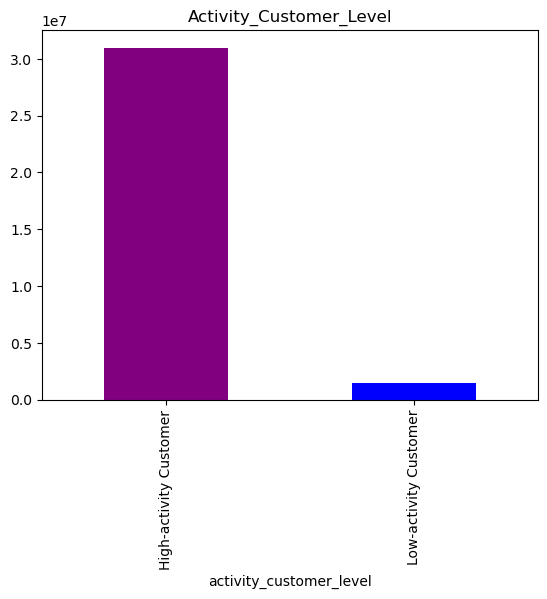

In [16]:
bar = df_ords_2['activity_customer_level'].value_counts().plot.bar(color =['purple', 'blue',])

plt.title('Activity_Customer_Level')

In [17]:
bar.figure.savefig(os.path.join(path, 'activity_customer_level.png'))

In [18]:
# Subsetting a new df based on a low-activity customer

low_activity_cust = df_ords_2[df_ords_2['activity_customer_level']=='low-activity Customer']

In [19]:
path = r'D:\DATA ANALYSIS\Achievement 4 project 29-04-2025\03 Scripts\Prepared Folder'  #creating a path

In [20]:
# exporting to pickle
low_activity_cust.to_pickle(os.path.join(path, 'low_activity_customers.pickle'))

In [21]:
# Subsetting a new df based on a high-activity customer

high_activity_cust = df_ords_2[df_ords_2['activity_customer_level']=='High-activity Customer']

In [22]:
# exporting to pickle
high_activity_cust.to_pickle(os.path.join(path, 'high_activity_customers.pickle'))

In [23]:
df_ords_2[['age','income','n_dependants']].describe()    #describing function

,age,income,n_dependants
count,3.243421e+07,3.243421e+07,3.243421e+07
mean,4.946521e+01,9.943525e+04,1.501872e+00
std,1.848553e+01,4.305473e+04,1.118871e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.699800e+04,1.000000e+00
50%,4.900000e+01,9.661200e+04,2.000000e+00
75%,6.500000e+01,1.279080e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


# defining function based on age_groups

In [24]:
age_groups=[]

for value in df_ords_2['age']:
    if value <33:
        age_groups.append('Young adult')
    elif value >=33 and value <49:
        age_groups.append('Adult')
    elif  value >=49 and value < 65:
        age_groups.append('Older adult')
    elif value >=65:
        age_groups.append('Senior')
    else: age_groups.append('Not enough information')
df_ords_2['age_group']=age_groups

In [25]:
df_ords_2['age_group'].value_counts(dropna= False)     # confirming function

age_group
Senior         8582637
Adult          8123449
Older adult    8095348
Young adult    7632778
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Distribution by Age Group')

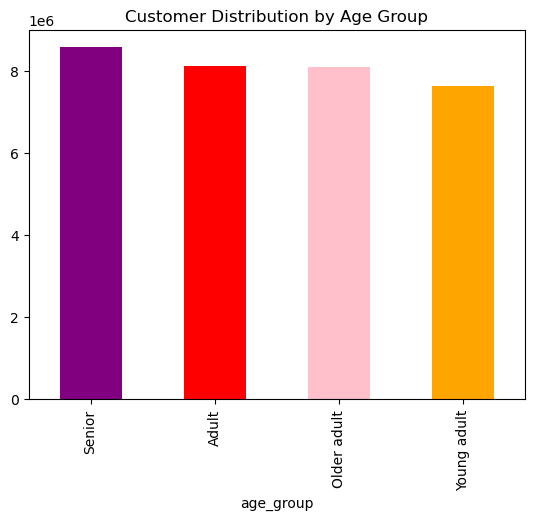

In [26]:
bar = df_ords_2['age_group'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange'])

plt.title('Customer Distribution by Age Group')

In [27]:
bar.figure.savefig(os.path.join(path, 'age_group.png'))

In [28]:
#Customer profiling based on income 
df_ords_2['income'].describe()

count    3.243421e+07
mean     9.943525e+04
std      4.305473e+04
min      2.590300e+04
25%      6.699800e+04
50%      9.661200e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64

# Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [29]:
income_bracket=[]

for value in df_ords_2['income']:
    if value <96608:
        income_bracket.append('Low Income Customer')
    elif value >=96608 and value <127876:
        income_bracket.append('Middle Income Customer')
    elif  value >=127876:
        income_bracket.append('High Income Customer')
    else: income_bracket.append('Not enough information')
df_ords_2['Income_bracket']=income_bracket

In [30]:
df_ords_2['Income_bracket'].value_counts(dropna= False)   #Confirming function

Income_bracket
Low Income Customer       16214373
High Income Customer       8112055
Middle Income Customer     8107784
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Distribution by income')

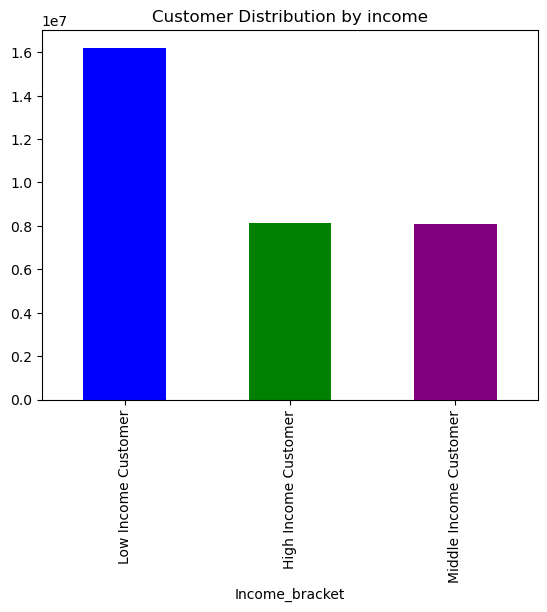

In [31]:
bar = df_ords_2['Income_bracket'].value_counts().plot.bar(color =['blue', 'green', 'purple'])

plt.title('Customer Distribution by income')

In [32]:
bar.figure.savefig(os.path.join(path, 'income_bracket.png'))

In [33]:
df_ords_2['n_dependants'].describe()    #Customer profiling based on number of dependants

count    3.243421e+07
mean     1.501872e+00
std      1.118871e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [34]:
dependents=[]

for value in df_ords_2['n_dependants']:
    if value <1:
       dependents.append('Single')
    elif value >=1:
        dependents.append('Parent')
    
    else: dependents.append('Not enough information')
df_ords_2['parent_status']=dependents

In [35]:
df_ords_2['parent_status'].value_counts(dropna= False)   #Confirming function

parent_status
Parent    24329015
Single     8105197
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Distribution by parent_status')

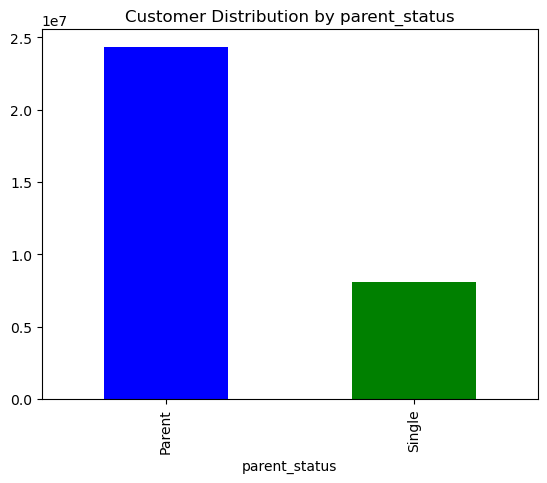

In [36]:
df_ords_2['parent_status'].value_counts().plot.bar(color =['blue', 'green'])

plt.title('Customer Distribution by parent_status')

In [37]:
bar.figure.savefig(os.path.join(path, 'parent_status.png'))

In [38]:
income_parent_ct = pd.crosstab(df_ords_2['Income_bracket'], df_ords_2['parent_status'])
print(income_parent_ct)


parent_status             Parent   Single
Income_bracket                           
High Income Customer     6075740  2036315
Low Income Customer     12183157  4031216
Middle Income Customer   6070118  2037666


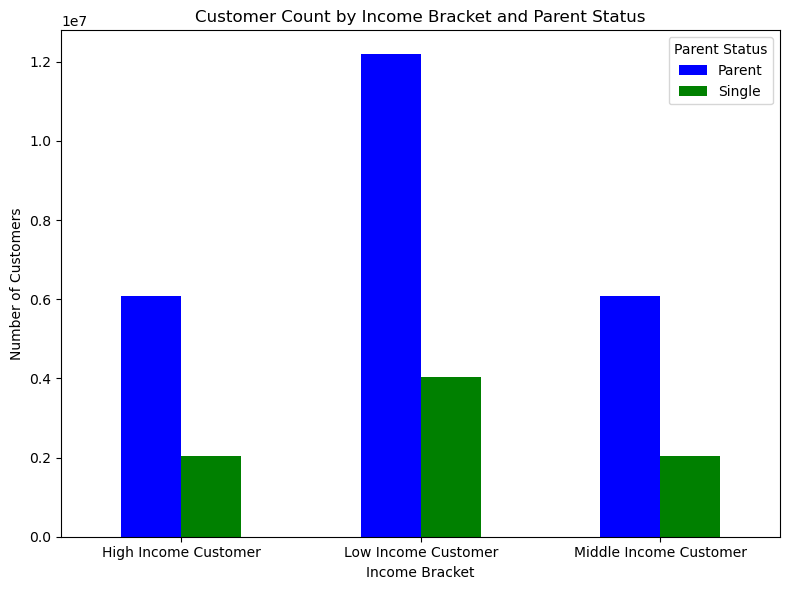

In [39]:
# Plotting grouped bar chart
bar = income_parent_ct.plot(kind='bar', figsize=(8, 6), color=['blue', 'green'])

# Chart formatting
plt.title('Customer Count by Income Bracket and Parent Status')
plt.xlabel('Income Bracket')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Parent Status')
plt.tight_layout()
plt.show()

In [40]:
bar.figure.savefig(os.path.join(path, 'count_income_status.png'))

In [51]:
print(df_ords_2.columns)

Index([                 'Unnamed: 0.1',                  'Unnamed: 0_x',
                            'order_id',                       'user_id',
                        'order_number',            'orders_day_of_week',
                   'order_hour_of_day',        'days_since_prior_order',
                          'product_id',             'add_to_cart_order',
                           'reordered',                        '_merge',
                        'Unnamed: 0_y',                  'product_name',
                            'aisle_id',                 'department_id',
                              'prices',                  'merge_source',
                     'price_range_loc',                   'Busiest day',
                        'Busiest days',                ('slowest day',),
                     ('slowest days',),                  'slowest days',
               'busiest_period_of_day',                     'max_order',
                        'loyalty_flag',            

In [52]:
df_sample = df_ords_2.sample(n=1000000, random_state=42)  # random_state makes it reproducible

# Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [53]:
df_sample = df_sample.groupby('Income_bracket')['prices'].agg(['max', 'mean', 'min'])

In [55]:
df_sample  #Confirming function

,max,mean,min
Income_bracket,,,
High Income Customer,99999.0,22.270705,1.0
Low Income Customer,99999.0,7.971870,1.0
Middle Income Customer,99999.0,9.587942,1.0


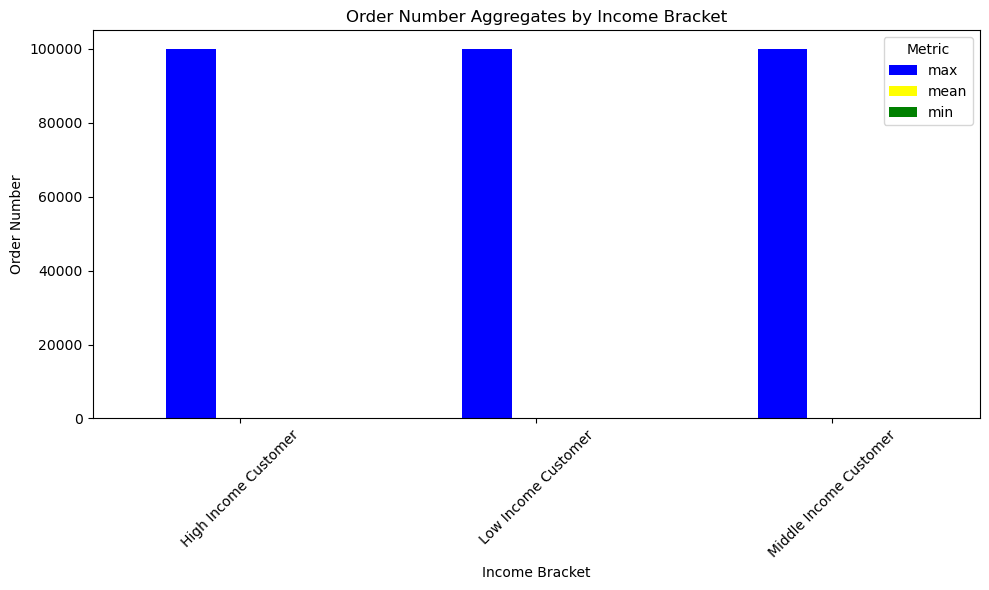

In [60]:
#plotting a bar chart
df_sample[['max', 'mean', 'min']].plot(
    kind='bar',
    figsize=(10, 6),
    color=['blue', 'yellow', 'green']
)

# Add titles and labels
plt.title('Order Number Aggregates by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Order Number')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [61]:
# Replace 99999 with NaN or a more realistic max value
df_sample['max'] = df_sample['max'].replace(99999.0, np.nan)  # or replace with a real number

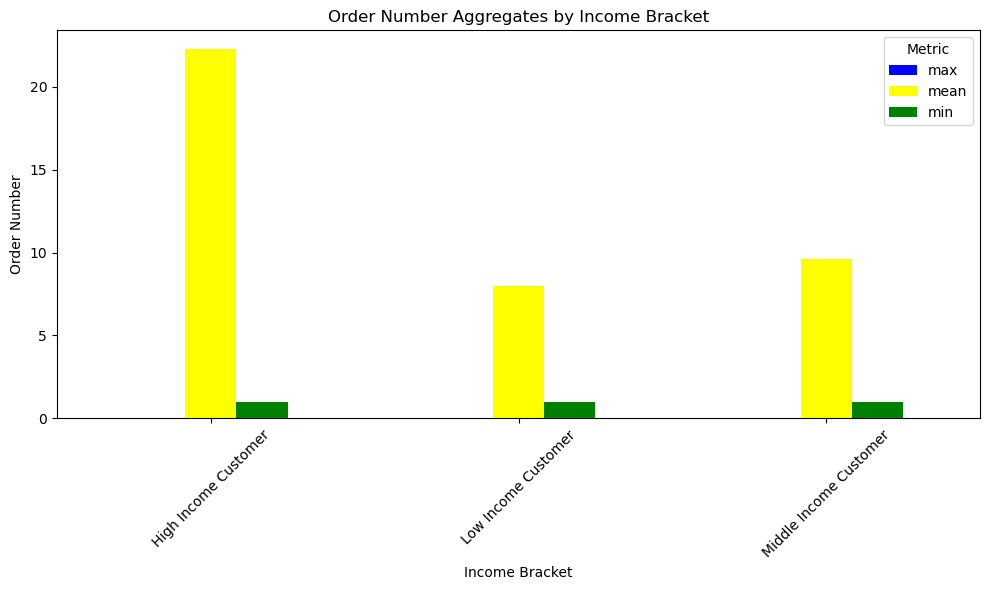

In [71]:
#plotting a bar chart
bar = df_sample[['max', 'mean', 'min']].plot(
    kind='bar',
    figsize=(10, 6),
    color=['blue', 'yellow', 'green']
)

# Add titles and labels
plt.title('Order Number Aggregates by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Order Number')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [72]:
bar.figure.savefig(os.path.join(path, 'count_income_order_number.png'))

In [63]:
# exporting to pickle
df_sample.to_pickle(os.path.join(path, 'df_sample.pickle'))

# High-income customers place significantly more orders on average (22.27) compared to middle-income (9.59) and low-income (7.97) customers, suggesting a strong link between income level and order frequency. The minimum order number is 1 for all groups, meaning some customers only ordered once. The maximum value of 99,999 is likely a data error or placeholder due to random sample subset

# Compare your customer profiles with regions and departments. Can you identify a link between them?

In [65]:
#A new subset of data filtered based on instacart's most popular demographic (Lower income parents)

low_income_parents = df_ords_2[(df_ords_2['parent_status'] == 'Parent') & (df_ords_2['Income_bracket'] == 'Low Income Customer')]

In [66]:
#confirming function
product_counts = low_income_parents['product_name'].value_counts(dropna=False)

In [69]:
Top_15_product_count = product_counts.head(15)

Text(0, 0.5, 'Count')

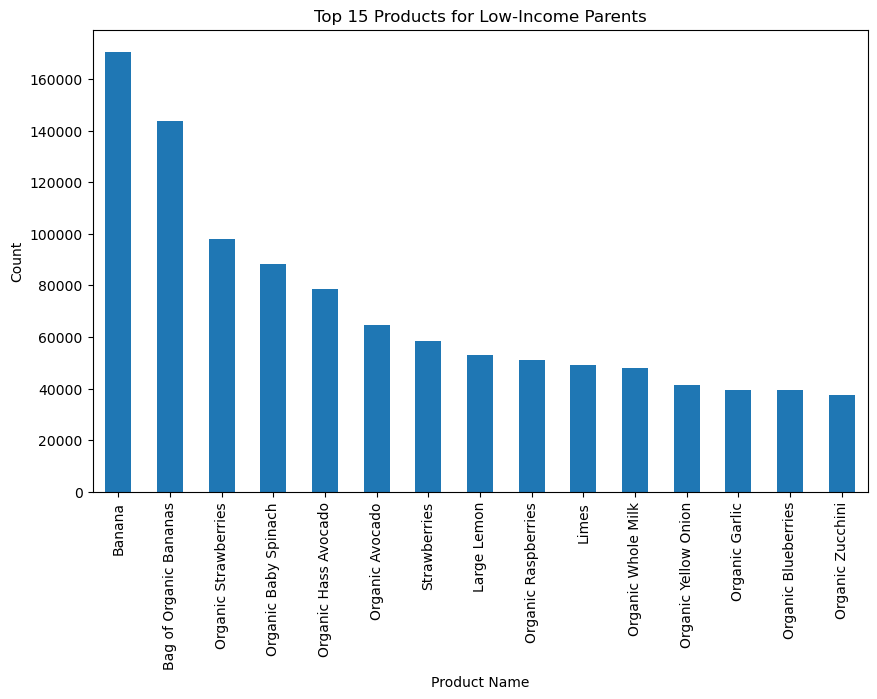

In [70]:
# Create a bar graph
bar = plt.figure(figsize=(10, 6))
Top_15_product_count.plot(kind='bar')

# Add labels and title
plt.title('Top 15 Products for Low-Income Parents')
plt.xlabel('Product Name')
plt.ylabel('Count')

In [73]:
bar.figure.savefig(os.path.join(path, 'top_15_products.png'))

# This graph shows the products most frequently ordered by this population, with a clear concentration in the produce department. These preferences suggest an opportunity for the marketing team to further highlight and promote these types of goods.

In [80]:
#Adding new column with names of the department_id

department_name = []

for value in df_ords_2['department_id']:
    if value == 1:
        department_name.append('frozen')
    elif value == 2:
        department_name.append('other')
    elif value == 3:
        department_name.append('bakery')
    elif value == 4:
        department_name.append('produce')
    elif value == 5:
        department_name.append('alcohol')
    elif value == 6:
        department_name.append('international')
    elif value == 7:
        department_name.append('beverages')
    elif value == 8:
        department_name.append('pets')
    elif value == 9:
        department_name.append('dry goods pasta')
    elif value == 10: 
        department_name.append('bulk')
    elif value == 11:
        department_name.append('personal care')
    elif value == 12:
        department_name.append('meat seafood')
    elif value == 13:
        department_name.append('pantry')
    elif value == 14:
        department_name.append('breakfast')
    elif value == 15:
        department_name.append('canned goods')
    elif value == 16:
        department_name.append('dairy eggs')
    elif value == 17:
        department_name.append('household')
    elif value == 18:
        department_name.append('babies')
    elif value == 19:
        department_name.append('snacks')
    elif value == 20:
        department_name.append('deli')
    elif value == 21:
        department_name.append('missing')
    else:
        department_name.append('Not enough information')


df_ords_2['department_name'] = department_name

In [ ]:
#creating a bar chart to show sales per department

([<matplotlib.axis.YTick at 0x1761720c380>,
 [Text(0, 0, '0'), Text(0, 5000000, '5000000'), Text(0, 10000000, '10000000')])

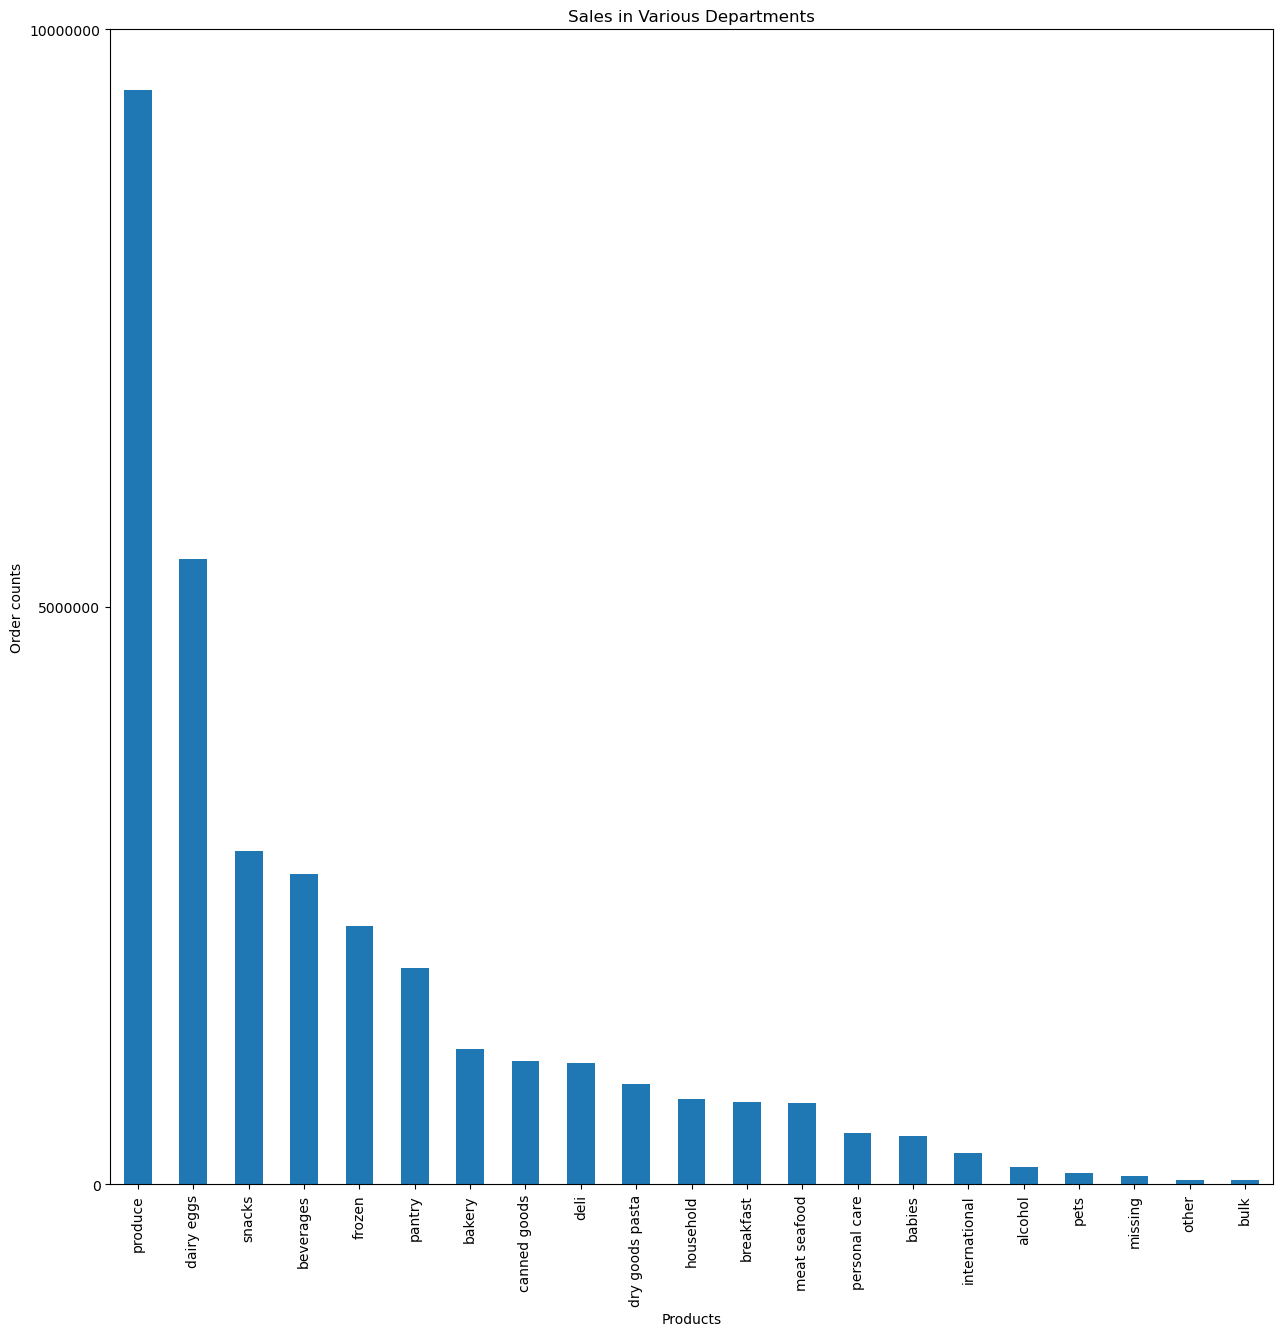

In [82]:
bar = plt.figure(figsize=(15, 15))

# Calculate the counts and sort by value (descending)
department_counts = df_ords_2['department_name'].value_counts().sort_values(ascending=False)

# Plot the bar chart with the sorted counts
department_counts.plot.bar()

# Add title and labels
plt.title('Sales in Various Departments')
plt.xlabel('Products')
plt.ylabel('Order counts')

# Add legend
plt.yticks(np.arange(0,15000000,5000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,5000000)])

In [83]:
bar.figure.savefig(os.path.join(path, 'sales_various_dept.png'))

In [84]:
# exporting to pickle
df_ords_2.to_pickle(os.path.join(path, 'df_ords_2.pickle'))